In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [4]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py


--2024-07-31 12:19:59--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2024-07-31 12:19:59 (113 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [5]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, unzip_data, walk_through_dir

In [6]:

import os

for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 2 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train'.
There are 0 directories and 655 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train/Normal'.
There are 0 directories and 420 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train/Malignant'.
There are 0 directories and 325 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train/Benign'.
There are 3 directories and 0 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Test'.
There are 0 directories and 72 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Test/Normal'.
There are 0 directories and 50 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Test/Malignant'.
There are 0 directories and 50 images in '/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Test

In [7]:
train_dir = "/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train"
test_dir = "/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Test"

In [8]:

import tensorflow as tf
BATCH_SIZE = 32
IMG_SIZE = (224, 224)
train_data= tf.keras.preprocessing.image_dataset_from_directory(train_dir,
                                                          label_mode= "categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

test_data = tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                          label_mode="categorical",
                                                          batch_size=BATCH_SIZE,
                                                          image_size=IMG_SIZE)

Found 1400 files belonging to 3 classes.
Found 172 files belonging to 3 classes.


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
import numpy as np
import random
import math
import csv
import cv2
import os

In [10]:
image_width = 224
image_height = 224
classes = ['Benign', 'Malignant', 'Normal']
datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Resimleri yüklemek için flow_from_directory kullanın
train_generator = datagen.flow_from_directory(
    directory="/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train",
    target_size=(image_width, image_height),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

# Her sınıf için resimleri ayrı ayrı arttırın
for cls in classes:
    # Sınıfın resimlerini yüklemek için flow_from_directory kullanın
    cls_generator = datagen.flow_from_directory(
        directory="/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train",
        target_size=(image_width, image_height),
        batch_size=32,
        class_mode='categorical',
        subset='training',
        classes=[cls]
    )

    # Resimleri arttırın ve kaydedin
    i = 0
    for batch in cls_generator:
        images, labels = batch
        for image in images:
            # Resmi kaydetmek için imwrite kullanın
            cv2.imwrite(os.path.join("/content/drive/MyDrive/Tez Dosyaları/low energy 3 classlı/Train", cls, f"augmented_{i}.jpg"), image * 255)
            i += 1
            if i >= 3000:  # Maksimum resim sayısına ulaşıldığında döngüyü durdur
                break
        else:
            continue
        break

Found 1400 images belonging to 3 classes.
Found 325 images belonging to 1 classes.
Found 420 images belonging to 1 classes.
Found 655 images belonging to 1 classes.


In [11]:
import tensorflow as tf

# 1. create base model with tf.keras.applications
base_model = tf.keras.applications.DenseNet121(include_top=False)

# 2. Freeze the base model
base_model.trainable = False

# 3. create inputs into our model
inputs = tf.keras.layers.Input(shape=(224, 224, 3), name="input_layer")

# 4. if using ResNet50V2 you will need to normalize inputs
# x = tf.keras.layers.experimental.preprocessing.Rescaling(1./255)(inputs)

# 5. pass the inputs to the base_model
x = base_model(inputs)
print(f"Shape after passing inputs through base model: {x.shape}")

# 6. average pool the outputs of the base model (aggregate all the most important information, reduce number of computations)
x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)
print(f"Shape after GlobalAveragePooling2D: {x.shape}")

# 7. create the output activation layer for 3 classes
outputs = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)
model_0 = tf.keras.Model(inputs, outputs)

# 8. compile the model for 3 classes
model_0.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Assuming you have already prepared your train_data and test_data
# Make sure that train_data and test_data are prepared with class_mode='categorical'

# 9. fit the model
history_0 = model_0.fit(train_data,
                        epochs=40,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=int(len(test_data)),
                        callbacks=[create_tensorboard_callback(dir_name="transfer_learning",
                                                               experiment_name="3_class_feature_extraction")])


29084464/29084464 [==============================] - 0s 0us/step
Shape after passing inputs through base model: (None, 7, 7, 1024)
Shape after GlobalAveragePooling2D: (None, 1024)
Saving TensorBoard log files to: transfer_learning/3_class_feature_extraction/20240731-122946
Epoch 1/40
44/44 [==============================] - 37s 545ms/step - loss: 1.2369 - accuracy: 0.4364 - val_loss: 1.2366 - val_accuracy: 0.4709
Epoch 2/40
44/44 [==============================] - 11s 208ms/step - loss: 1.0818 - accuracy: 0.4936 - val_loss: 1.2394 - val_accuracy: 0.4360
Epoch 3/40
44/44 [==============================] - 10s 200ms/step - loss: 1.0689 - accuracy: 0.5100 - val_loss: 1.2421 - val_accuracy: 0.4477
Epoch 4/40
44/44 [==============================] - 10s 204ms/step - loss: 0.9909 - accuracy: 0.5479 - val_loss: 1.3461 - val_accuracy: 0.4360
Epoch 5/40
44/44 [==============================] - 11s 203ms/step - loss: 0.9690 - accuracy: 0.5579 - val_loss: 1.0532 - val_accuracy: 0.5116
Epoch 6/40


In [12]:
# Evaluate the model on the test data
results_feature_extraction = model_0.evaluate(test_data)
results_feature_extraction

6/6 [==============================] - 2s 81ms/step - loss: 1.0806 - accuracy: 0.5000


[1.0806046724319458, 0.5]

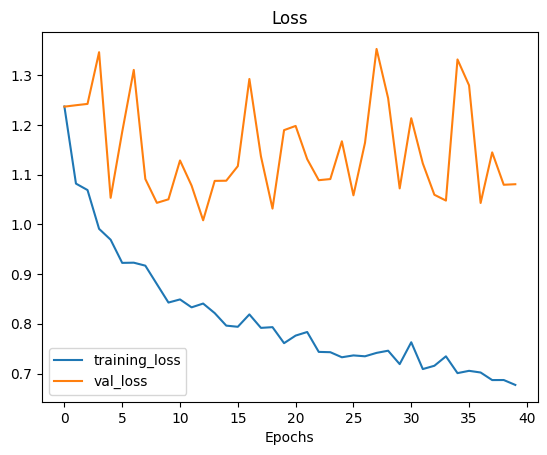

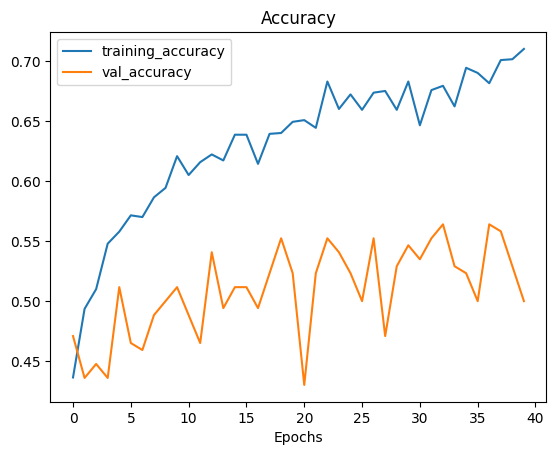

In [13]:
plot_loss_curves(history_0)

In [14]:

from sklearn.metrics import classification_report

# Assuming you have true labels for your test data stored in y_true
# and predictions from your model stored in y_pred

# Convert categorical predictions to class labels
y_pred_labels = np.argmax(model_0.predict(test_data), axis=1)

# Get true labels from the test dataset
y_true_labels = np.concatenate([y for x, y in test_data], axis=0)
y_true_labels = np.argmax(y_true_labels, axis=1)

# Generate classification report
report = classification_report(y_true_labels, y_pred_labels)

print(report)

6/6 [==============================] - 3s 97ms/step
              precision    recall  f1-score   support

           0       0.33      0.20      0.25        50
           1       0.30      0.32      0.31        50
           2       0.42      0.51      0.46        72

    accuracy                           0.37       172
   macro avg       0.35      0.34      0.34       172
weighted avg       0.36      0.37      0.36       172



In [15]:
# Eğitim doğruluğunu geçmiş verilerinden al
train_accuracy = history_0.history['accuracy']

# Son epoch'un eğitim doğruluğunu yazdır
print("Eğitim doğruluğu:", train_accuracy[-1])

Eğitim doğruluğu: 0.7099999785423279
